# Complete Machine Learning Project Assignment

One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community calls these unfortunate purchases "kicks".

Kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle.

Modelers who can figure out which cars have a higher risk of being kick can provide real value to dealerships trying to provide the best inventory selection possible to their customers.

The challenge of this competition is to predict if the car purchased at the Auction is a Kick (bad buy).

I am using the [Don't Get Kicked!](https://www.kaggle.com/competitions/DontGetKicked/data) competetion data in this project. 

## Dataset Description
- The challenge of this competition is to predict if the car purchased at the Auction is a good / bad buy.
- All the variables in the data set are defined in the file Carvana_Data_Dictionary.txt 
- The data contains missing values 
- The dependent variable (IsBadBuy) is binary (C2)
- There are 32 Independent variables (C3-C34)
- The data set is split to 60% training and 40% testing.

## Importing modules

In [1]:
!pip install numpy pandas scikit-learn matplotlib seaborn jovian opendatasets imblearn

     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 63 kB 2.2 MB/s             
  Preparing metadata (setup.py) ... done
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 226 kB 12.7 MB/s            
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 297 kB 64.8 MB/s            
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 9.6 MB 51.6 MB/s            
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 78 kB 9.5 MB/s             
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77734 sha256=16fba396c168f5fd329be4cfe604df73bdfe71e4b0927c8a908c3b8c10ddb4d8
  Stored in directory: /home/jovyan/.cache/pip/wheels/9c/45/15/6d6d116cd2539fb8f450d64b0aee4a480e5366bb11b42ac763
Successfully built kaggle
  Att

In [2]:
import opendatasets as od 
import jovian 

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
sns.set()

## Download the dataset
Using `opendatasets` library to download the dataset from kaggle.

In [3]:
od.download('https://www.kaggle.com/competitions/DontGetKicked/')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: subhadeepmandal0506
Your Kaggle Key: Â·Â·Â·Â·Â·Â·Â·Â·


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 10.2M/10.2M [00:00<00:00, 42.2MB/s]



Extracting archive ./DontGetKicked/DontGetKicked.zip to ./DontGetKicked


In [4]:
os.listdir('DontGetKicked')

['training.zip',
 'training.csv',
 'test.csv',
 'Carvana_Data_Dictionary.txt',
 'test.zip',
 'example_entry.csv']

In [5]:
DATA_PATH = 'DontGetKicked/'
TRAIN_DATA = DATA_PATH + 'training.csv'
TEST_DATA = DATA_PATH + 'test.csv'

In [6]:
train_data = pd.read_csv(TRAIN_DATA)
test_data = pd.read_csv(TEST_DATA)
train_data

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,...,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,...,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,...,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,...,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


In [7]:
test_data

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,...,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,...,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,...,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,...,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,...,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,11/17/2010,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,...,9764.0,11395.0,NaN,NaN,20928,33411,FL,7955.0,0,1633
48703,121743,11/17/2010,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,...,10283.0,11565.0,NaN,NaN,20928,33411,FL,7035.0,0,594
48704,121744,11/17/2010,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,...,7871.0,9490.0,NO,GREEN,20928,33411,FL,6335.0,0,594
48705,121745,11/17/2010,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,...,8576.0,9937.0,NO,GREEN,20928,33411,FL,8055.0,0,1038


## Dataset columns summary

||Field Name				             |Definition|
|---|---|---|
|1|RefID				                 |Unique (sequential) number assigned to vehicles|
|2|IsBadBuy				             |Identifies if the kicked vehicle was an avoidable purchase |
|3|PurchDate				             |The Date the vehicle was Purchased at Auction|
|4|Auction					         |Auction provider at which the  vehicle was purchased|
|5|VehYear					         |The manufacturer's year of the vehicle|
|6|VehicleAge				             |The Years elapsed since the manufacturer's year|
|7|Make					             |Vehicle Manufacturer |
|8|Model					             |Vehicle Model|
|9|Trim					             |Vehicle Trim Level|
|10|SubModel				             |Vehicle Submodel|
|11|Color					             |Vehicle Color|
|12|Transmission				         |Vehicles transmission type (Automatic, Manual)|
|13|WheelTypeID				         |The type id of the vehicle wheel|
|14|WheelType				             |The vehicle wheel type description (Alloy, Covers)|
|15|VehOdo					             |The vehicles odometer reading|
|16|Nationality				         |The Manufacturer's country|
|17|Size					             |The size category of the vehicle (Compact, SUV, etc.)|
|18|TopThreeAmericanName			     |Identifies if the manufacturer is one of the top three American manufacturers|
|19|MMRAcquisitionAuctionAveragePrice	 |Acquisition price for this vehicle in average condition at time of purchase|	
|20|MMRAcquisitionAuctionCleanPrice	 |Acquisition price for this vehicle in the above Average condition at time of purchase|
|21|MMRAcquisitionRetailAveragePrice	 |Acquisition price for this vehicle in the retail market in average condition at time of purchase|
|22|MMRAcquisitonRetailCleanPrice		 |Acquisition price for this vehicle in the retail market in above average condition at time of purchase|
|23|MMRCurrentAuctionAveragePrice		 |Acquisition price for this vehicle in average condition as of current day	|
|24|MMRCurrentAuctionCleanPrice		 |Acquisition price for this vehicle in the above condition as of current day|
|25|MMRCurrentRetailAveragePrice		 |Acquisition price for this vehicle in the retail market in average condition as of current day|
|26|MMRCurrentRetailCleanPrice		     |Acquisition price for this vehicle in the retail market in above average condition as of current day|
|27|PRIMEUNIT				             |Identifies if the vehicle would have a higher demand than a standard purchase|
|28|AcquisitionType				     |Identifies how the vehicle was aquired (Auction buy, trade in, etc)|
|29|AUCGUART				             |The level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is)|
|30|KickDate				             |Date the vehicle was kicked back to the auction|
|31|BYRNO					             |Unique number assigned to the buyer that purchased the vehicle|
|32|VNZIP                               |Zipcode where the car was purchased|
|33|VNST                                |State where the the car was purchased|
|34|VehBCost				             |Acquisition cost paid for the vehicle at time of purchase|
|35|IsOnlineSale				         |Identifies if the vehicle was originally purchased online|
|36|WarrantyCost                        |Warranty price (term=36month  and millage=36K)

## Data Cleaning

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [9]:
train_data.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [ ]:
# jovian.commit(project='course-project-assignment', privacy='secret')

The `RefId` column is non essential so we can drop it.

In [10]:
X_train = train_data.drop(
    ['RefId', 'IsBadBuy'], 
    axis=1
)
X_test = test_data.drop(
    ['RefId'], 
    axis=1
)


y_train = train_data['IsBadBuy']

## Splitting the data into Train, Validation and Test sets

Splitting the data into train, validation and test sets as follows:
- Train:       70%
- Validation:  10%
- Test:        20%

In [11]:
train_input, val_input, train_target, val_target = train_test_split(X_train, y_train, test_size=0.1)
test_input = X_test

The columns `PRIMEUNIT` and `AUCGUART` have alot missing data. So we will drop them. Also the columns `WheelTypeID` and `WheelType` columns don't look important.

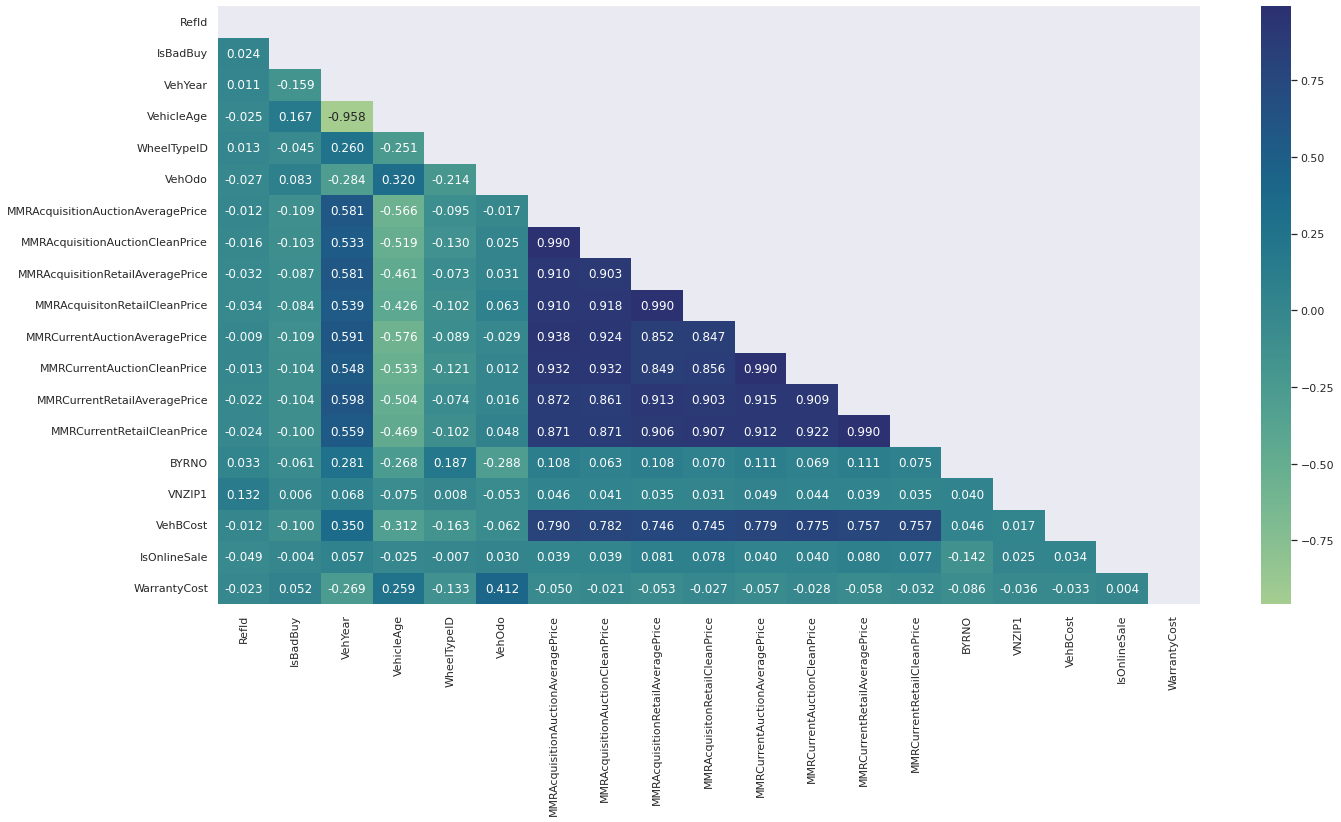

In [12]:
plt.figure(figsize=(22, 11))
corr_matx = np.triu(train_data.corr())

sns.heatmap(
    train_data.corr(),
    cmap='crest',
    annot=True,
    fmt='.3f',
    mask=corr_matx,
)

plt.show()

In [ ]:
# jovian.commit()

The following columns will be dropped:
1. `VehYear` - `VehicleAge` is similar to `VehYear`. So it can be removed.
2. `BYRNO` - It is unique number assigned to the buyer that purchased the vehicle. Can be ignored.
3. `WheelTypeID` - `WheelTypeID` and is numerical form of `WheelType`. So it can be removed.
4. `VNST` and `VNZIP` - State and Zipcode of vehicle purchase location, which is useless.
5. `PurchDate` - Purchase date will be useless as well.
6. `IsOnlineSale` - It has low covarience. So can be dropped.

In [13]:
drop_cols = ['VehYear', 
             'BYRNO', 
             'WheelTypeID', 
             'VNST', 
             'VNZIP1', 
             'PurchDate',
            ]

In [14]:
categorical_cols = train_input.select_dtypes(include='object').columns.to_list()
numerical_cols = train_input.select_dtypes(include=np.number).columns.to_list()

print(f"Categorical columns: {categorical_cols}\n")
print(f"Numeric columns: {numerical_cols}")

Categorical columns: ['PurchDate', 'Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'VNST']

Numeric columns: ['VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO', 'VNZIP1', 'VehBCost', 'IsOnlineSale', 'WarrantyCost']


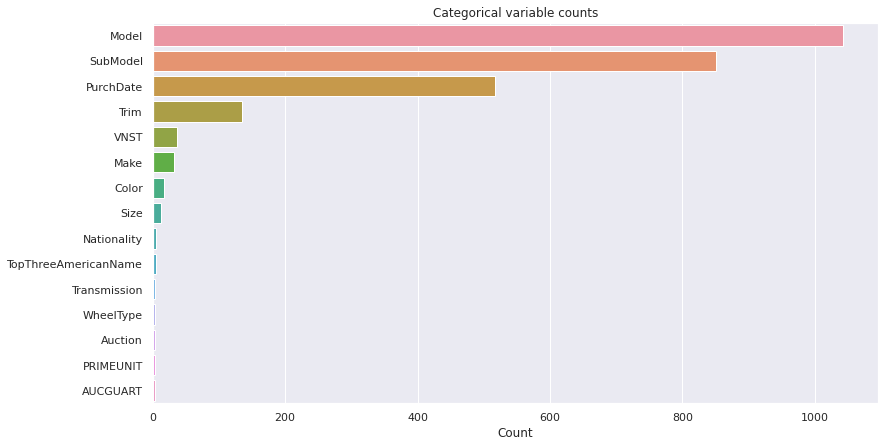

In [15]:
category_counts = {
    col: len(train_input[col].unique()) for col in categorical_cols
}

category_counts_df = pd.DataFrame(
    index=category_counts.keys(), 
    data=category_counts.values(), 
    columns=['Count'],
)

category_counts_df = category_counts_df.sort_values("Count", ascending=False)

plt.figure(figsize=(13, 7))

sns.barplot(
    y=category_counts_df.index, 
    x=category_counts_df.Count,
)

plt.title('Categorical variable counts')
plt.show()

In [ ]:
# jovian.commit()

We will remove `Trim`, `Model` and `SubModel` as their variable count is relatively high.

In [16]:
drop_cols.extend(['Model', 'SubModel', 'Trim'])

In [17]:
missing_count = pd.DataFrame(
    train_input.isna().sum()[train_input.isna().sum() > 0].sort_values(ascending=False),
    columns=['counts'],
)
missing_count

,counts
AUCGUART,62608
PRIMEUNIT,62608
WheelType,2859
WheelTypeID,2856
Trim,2135
MMRCurrentAuctionAveragePrice,288
MMRCurrentAuctionCleanPrice,288
MMRCurrentRetailAveragePrice,288
MMRCurrentRetailCleanPrice,288
MMRAcquisitionAuctionCleanPrice,17


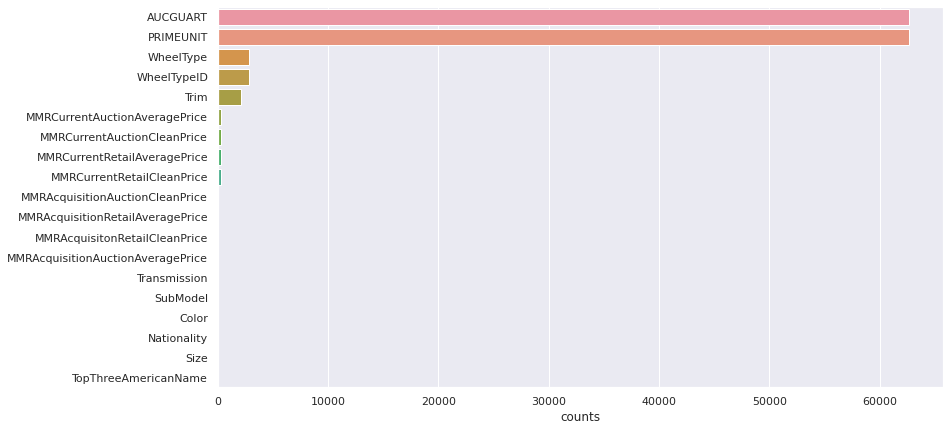

In [18]:
plt.figure(figsize=(13, 7))

sns.barplot(
    x=missing_count.counts, 
    y=missing_count.index,
)

plt.show()

We will definitely drop `AUCGUART` and `PRIMEUNIT` columns as they have high missing count.

In [19]:
drop_cols.extend(['AUCGUART', 'PRIMEUNIT'])

Dropping the columns that were selected

In [20]:
train_input = train_input.drop(drop_cols, axis=1)
val_input = val_input.drop(drop_cols, axis=1)
test_input = test_input.drop(drop_cols, axis=1)

train_input.head()

,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,...,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
59150,MANHEIM,3,CHRYSLER,SILVER,AUTO,Covers,68471,AMERICAN,MEDIUM,CHRYSLER,...,6596.0,6509.0,7624.0,5115.0,6246.0,6024.0,7246.0,5260.0,0,1215
19892,OTHER,1,CHEVROLET,BLUE,AUTO,Covers,75009,AMERICAN,LARGE,GM,...,9262.0,9145.0,10503.0,7987.0,9237.0,11757.0,13308.0,7435.0,0,1974
61968,ADESA,5,DODGE,GREEN,AUTO,Alloy,76139,AMERICAN,SPECIALTY,CHRYSLER,...,9104.0,11687.0,12796.0,7385.0,9086.0,11176.0,13023.0,9915.0,0,1389
39509,MANHEIM,3,CHEVROLET,SILVER,AUTO,Alloy,70292,AMERICAN,LARGE,GM,...,8151.0,7916.0,9303.0,6867.0,8151.0,7916.0,9303.0,6915.0,0,1974
55054,OTHER,5,TOYOTA,SILVER,AUTO,Alloy,50713,TOP LINE ASIAN,MEDIUM,OTHER,...,10267.0,9596.0,11588.0,8505.0,10062.0,9685.0,11367.0,8925.0,0,505


In [21]:
len(train_input)

65684

## Handling Missing Categorical Data

In [22]:
categorical_cols = train_input.select_dtypes(include='object').columns.to_list()
numerical_cols = train_input.select_dtypes(include=np.number).columns.to_list()

print(f"Categorical columns: {categorical_cols}\n")
print(f"Numeric columns: {numerical_cols}")

Categorical columns: ['Auction', 'Make', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName']

Numeric columns: ['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VehBCost', 'IsOnlineSale', 'WarrantyCost']


In [23]:
print("Missing categorical variables count: ")
train_input[categorical_cols].isna().sum().sort_values(ascending=False)

Missing categorical variables count: 


WheelType               2859
Transmission               7
Color                      6
Nationality                4
Size                       4
TopThreeAmericanName       4
Auction                    0
Make                       0
dtype: int64

We will fill the missing categorical columns with the most frequent variable from each columns.

In [24]:
fillna_wheel_type = train_input['WheelType'].value_counts(dropna=False).index[0]
fillna_transmission = train_input['Transmission'].value_counts(dropna=False).index[0]
fillna_color = train_input['Color'].value_counts(dropna=False).index[0]
fillna_nationality = train_input['Nationality'].value_counts(dropna=False).index[0]
fillna_size = train_input['Size'].value_counts(dropna=False).index[0]
fillna_top_name = train_input['TopThreeAmericanName'].value_counts(dropna=False).index[0]

print(f"""WheelType: {fillna_wheel_type}
Transmission: {fillna_transmission}
Color: {fillna_color}
Nationality: {fillna_nationality}
Size: {fillna_size}
TopThreeAmericanName: {fillna_top_name}""")

WheelType: Alloy
Transmission: AUTO
Color: SILVER
Nationality: AMERICAN
Size: MEDIUM
TopThreeAmericanName: GM


In [25]:
train_input['WheelType'].fillna(value=fillna_wheel_type, inplace=True)
train_input['Transmission'].fillna(value=fillna_transmission, inplace=True)
train_input['Color'].fillna(value=fillna_color, inplace=True)
train_input['Nationality'].fillna(value=fillna_nationality, inplace=True)
train_input['Size'].fillna(value=fillna_size, inplace=True)
train_input['TopThreeAmericanName'].fillna(value=fillna_top_name, inplace=True)

val_input['WheelType'].fillna(value=fillna_wheel_type, inplace=True)
val_input['Transmission'].fillna(value=fillna_transmission, inplace=True)
val_input['Color'].fillna(value=fillna_color, inplace=True)
val_input['Nationality'].fillna(value=fillna_nationality, inplace=True)
val_input['Size'].fillna(value=fillna_size, inplace=True)
val_input['TopThreeAmericanName'].fillna(value=fillna_top_name, inplace=True)

test_input['WheelType'].fillna(value=fillna_wheel_type, inplace=True)
test_input['Transmission'].fillna(value=fillna_transmission, inplace=True)
test_input['Color'].fillna(value=fillna_color, inplace=True)
test_input['Nationality'].fillna(value=fillna_nationality, inplace=True)
test_input['Size'].fillna(value=fillna_size, inplace=True)
test_input['TopThreeAmericanName'].fillna(value=fillna_top_name, inplace=True)

In [26]:
train_input[categorical_cols].isna().sum().sort_values(ascending=False)

Auction                 0
Make                    0
Color                   0
Transmission            0
WheelType               0
Nationality             0
Size                    0
TopThreeAmericanName    0
dtype: int64

In [ ]:
# jovian.commit()

## Handing Missing Numerical Data

In [27]:
print("Missing numerical variables count: ")
train_input[numerical_cols].isna().sum().sort_values(ascending=False)

Missing numerical variables count: 


MMRCurrentAuctionAveragePrice        288
MMRCurrentAuctionCleanPrice          288
MMRCurrentRetailAveragePrice         288
MMRCurrentRetailCleanPrice           288
MMRAcquisitionAuctionAveragePrice     17
MMRAcquisitionAuctionCleanPrice       17
MMRAcquisitionRetailAveragePrice      17
MMRAcquisitonRetailCleanPrice         17
VehicleAge                             0
VehOdo                                 0
VehBCost                               0
IsOnlineSale                           0
WarrantyCost                           0
dtype: int64

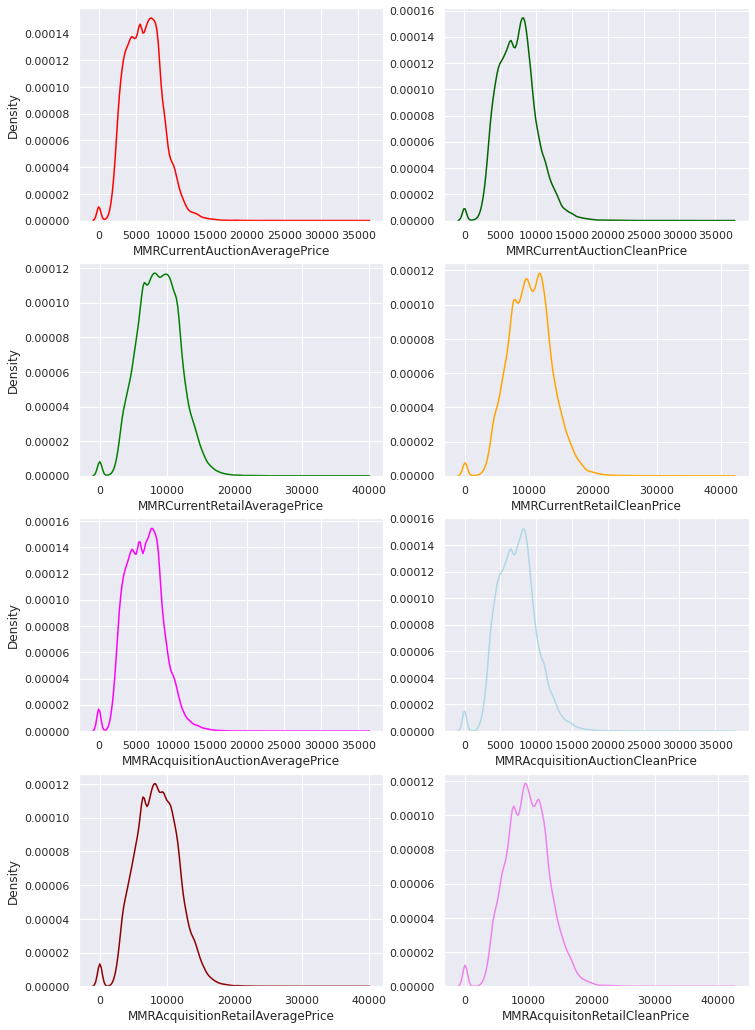

In [28]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(12, 18))

sns.kdeplot(train_input.MMRCurrentAuctionAveragePrice, ax=ax1, color='red')
sns.kdeplot(train_input.MMRCurrentAuctionCleanPrice, ax=ax2, color='darkgreen')
ax2.set_ylabel("")

sns.kdeplot(train_input.MMRCurrentRetailAveragePrice, ax=ax3, color='green')
sns.kdeplot(train_input.MMRCurrentRetailCleanPrice, ax=ax4, color='orange')
ax4.set_ylabel("")

sns.kdeplot(train_input.MMRAcquisitionAuctionAveragePrice, ax=ax5, color='magenta')
sns.kdeplot(train_input.MMRAcquisitionAuctionCleanPrice, ax=ax6, color='lightblue')
ax6.set_ylabel("")

sns.kdeplot(train_input.MMRAcquisitionRetailAveragePrice, ax=ax7, color='darkred')
sns.kdeplot(train_input.MMRAcquisitonRetailCleanPrice, ax=ax8, color='violet')
ax8.set_ylabel("")

plt.show()

We can see that `MMR*` columns have right skewed distribution. So, we will use the mean data to replace the missing data of these columns.

In [29]:
imputer = SimpleImputer(
    strategy='mean',
)
imputer.fit(train_input[numerical_cols])
train_input[numerical_cols] = imputer.transform(train_input[numerical_cols])
val_input[numerical_cols] = imputer.transform(val_input[numerical_cols])
test_input[numerical_cols] = imputer.transform(test_input[numerical_cols])

In [30]:
print("Missing numerical variables count: ")
train_input[numerical_cols].isna().sum().sort_values(ascending=False)

Missing numerical variables count: 


VehicleAge                           0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

In [ ]:
# jovian.commit()

## Scaling Numerical Data

In [31]:
scaler = MinMaxScaler()
scaler.fit(train_input[numerical_cols])

MinMaxScaler()

In [32]:
train_input[numerical_cols] = scaler.transform(train_input[numerical_cols])
val_input[numerical_cols] = scaler.transform(val_input[numerical_cols])
test_input[numerical_cols] = scaler.transform(test_input[numerical_cols])

In [33]:
train_input[numerical_cols].head()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
59150,0.333333,0.573946,0.155758,0.178952,0.166556,0.183791,0.143189,0.169457,0.154145,0.176465,0.115664,0.0,0.111787
19892,0.111111,0.632904,0.224092,0.251282,0.234007,0.253194,0.223588,0.250604,0.300844,0.324095,0.163500,0.0,0.224466
61968,0.555556,0.643094,0.215637,0.246995,0.299053,0.308471,0.206735,0.246507,0.285977,0.317155,0.218043,0.0,0.137619
39509,0.333333,0.590367,0.192234,0.221140,0.202559,0.224266,0.192234,0.221140,0.202559,0.226560,0.152063,0.0,0.224466
55054,0.555556,0.413808,0.235765,0.278548,0.245548,0.279350,0.238089,0.272986,0.247825,0.276825,0.196270,0.0,0.006384


## One Hot Encoding the Categorical Data

In [34]:
category_counts = {
    col: len(train_input[col].unique()) for col in categorical_cols
}

for key, val in category_counts.items():
    print(f"{key}: {val}")

Auction: 3
Make: 33
Color: 16
Transmission: 3
WheelType: 3
Nationality: 4
Size: 12
TopThreeAmericanName: 4


In [35]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(train_input[categorical_cols])

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [36]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [37]:
train_input[encoded_cols] = encoder.transform(train_input[categorical_cols])
val_input[encoded_cols] = encoder.transform(val_input[categorical_cols])
test_input[encoded_cols] = encoder.transform(test_input[categorical_cols])

In [38]:
train_input[encoded_cols].head()

,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,...,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER
59150,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19892,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
61968,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
39509,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55054,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
X_train = train_input[numerical_cols + encoded_cols]
X_val = val_input[numerical_cols + encoded_cols]
X_test = test_input[numerical_cols + encoded_cols]

In [40]:
X_train.head()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,...,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER
59150,0.333333,0.573946,0.155758,0.178952,0.166556,0.183791,0.143189,0.169457,0.154145,0.176465,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19892,0.111111,0.632904,0.224092,0.251282,0.234007,0.253194,0.223588,0.250604,0.300844,0.324095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
61968,0.555556,0.643094,0.215637,0.246995,0.299053,0.308471,0.206735,0.246507,0.285977,0.317155,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
39509,0.333333,0.590367,0.192234,0.221140,0.202559,0.224266,0.192234,0.221140,0.202559,0.226560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55054,0.555556,0.413808,0.235765,0.278548,0.245548,0.279350,0.238089,0.272986,0.247825,0.276825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# jovian.commit()

## Training the Model

Let's check if the data is balanced.

In [41]:
train_target.value_counts()

0    57607
1     8077
Name: IsBadBuy, dtype: int64

The data is highly imbalanced. This will definitely hamper out training. We will need to oversample the data. We will use SMOTE for this purpose.

In [42]:
smote = SMOTE(random_state=42)
X_train_smote, train_target_smote = smote.fit_resample(X_train, train_target)

In [43]:
train_target_smote.value_counts()

0    57607
1    57607
Name: IsBadBuy, dtype: int64

### Logistic Regression

In [44]:
logreg = LogisticRegression(random_state=42, solver='liblinear')
logreg.fit(X_train_smote, train_target_smote)

LogisticRegression(random_state=42, solver='liblinear')

In [45]:
train_pred = logreg.predict(X_train)
train_acc = accuracy_score(train_target, train_pred)

val_pred = logreg.predict(X_val)
val_acc = accuracy_score(val_target, val_pred)

print(f"""Train accuracy: {train_acc}
Val accuracy: {val_acc}""")

Train accuracy: 0.6430789842275135
Val accuracy: 0.6363885463762159


### Random Forest Classifier

In [46]:
random_forest = RandomForestClassifier(
    n_estimators=100, 
    n_jobs=-1, 
    random_state=42
)
random_forest.fit(X_train_smote, train_target_smote)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [47]:
train_pred = random_forest.predict(X_train)
train_acc = accuracy_score(train_target, train_pred)

val_pred = random_forest.predict(X_val)
val_acc = accuracy_score(val_target, val_pred)

print(f"""Train accuracy: {train_acc}
Val accuracy: {val_acc}""")

Train accuracy: 1.0
Val accuracy: 0.8368269625976161


In [48]:
random_forest = RandomForestClassifier(
    n_estimators=500,
    max_depth=16,
    n_jobs=-1, 
    random_state=42
)
random_forest.fit(X_train_smote, train_target_smote)
train_pred = random_forest.predict(X_train)
train_acc = accuracy_score(train_target, train_pred)

val_pred = random_forest.predict(X_val)
val_acc = accuracy_score(val_target, val_pred)

print(f"""Train accuracy: {train_acc}
Val accuracy: {val_acc}""")

Train accuracy: 0.8500548078679739
Val accuracy: 0.7525688450472667


In [49]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=50,
    n_jobs=-1, 
    random_state=42
)
random_forest.fit(X_train_smote, train_target_smote)
train_pred = random_forest.predict(X_train)
train_acc = accuracy_score(train_target, train_pred)

val_pred = random_forest.predict(X_val)
val_acc = accuracy_score(val_target, val_pred)

print(f"""Train accuracy: {train_acc}
Val accuracy: {val_acc}""")

Train accuracy: 1.0
Val accuracy: 0.8354569119057406


Let's check if the model performes better if data was imbalanced

In [50]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1, 
    random_state=42
)
random_forest.fit(X_train, train_target)

train_pred = random_forest.predict(X_train)
train_acc = accuracy_score(train_target, train_pred)

val_pred = random_forest.predict(X_val)
val_acc = accuracy_score(val_target, val_pred)

report = classification_report(val_target, val_pred)

print(f"""Train accuracy: {train_acc}
Val accuracy: {val_acc}""")

print(f"""Classification report:
{report}""")

Train accuracy: 0.999969551184459
Val accuracy: 0.8762844225236334
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      6400
           1       0.47      0.03      0.06       899

    accuracy                           0.88      7299
   macro avg       0.67      0.51      0.50      7299
weighted avg       0.83      0.88      0.83      7299



Surprisingly, model performes well in case of imbalanced data. We will finetune this model using other hyperparameters and chose the best paramameters. 

In [73]:
def run_with_hyperparams(n_estimators=100, n_jobs=-1, random_state=42, **kwargs):
    random_forest = RandomForestClassifier(
        n_estimators=n_estimators,
        n_jobs=n_jobs,
        random_state=random_state,
        **kwargs
    )
    random_forest.fit(X_train, train_target)

    train_pred = random_forest.predict(X_train)
    train_acc = accuracy_score(train_target, train_pred)

    val_pred = random_forest.predict(X_val)
    val_acc = accuracy_score(val_target, val_pred)

    print(f"""Train accuracy: {train_acc}
Val accuracy: {val_acc}""")

In [58]:
run_with_hyperparams(max_depth=50, min_samples_split=3, min_samples_leaf=2, max_leaf_nodes=50)

Train accuracy: 0.8773369465927775
Val accuracy: 0.8771064529387588


In [59]:
run_with_hyperparams(max_depth=50, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=100)

Train accuracy: 0.8773978442238597
Val accuracy: 0.8771064529387588


In [64]:
run_with_hyperparams(max_depth=100, min_samples_split=2, min_samples_leaf=1)

Train accuracy: 0.999969551184459
Val accuracy: 0.8762844225236334


In [65]:
run_with_hyperparams(max_depth=100, min_samples_split=4, min_samples_leaf=2)

Train accuracy: 0.9312313501004811
Val accuracy: 0.8768324428003836


In [66]:
run_with_hyperparams(max_depth=100, min_samples_split=4, min_samples_leaf=1)

Train accuracy: 0.985080080384873
Val accuracy: 0.8773804630771338


In [68]:
run_with_hyperparams(max_depth=200, min_samples_split=4, min_samples_leaf=1)

Train accuracy: 0.985080080384873
Val accuracy: 0.8773804630771338


In [69]:
run_with_hyperparams(max_depth=100, min_samples_split=4, min_samples_leaf=3)

Train accuracy: 0.8996407039766153
Val accuracy: 0.8769694478695712


In [70]:
run_with_hyperparams(max_depth=100, min_samples_split=6, min_samples_leaf=1)

Train accuracy: 0.95356555629986
Val accuracy: 0.8775174681463214


In [72]:
run_with_hyperparams(max_depth=100, min_samples_split=6, min_samples_leaf=2)

Train accuracy: 0.9162962060775836
Val accuracy: 0.8762844225236334


So, the random forest with the following params performs best, approximately.
- n_estimators=100
- max_depth=100 
- min_samples_split=6 
- min_samples_leaf=1

In [74]:
model = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=42,
    max_depth=100, 
    min_samples_split=6, 
    min_samples_leaf=1
)

model.fit(X_train, train_target)

train_pred = model.predict(X_train)
train_acc = accuracy_score(train_target, train_pred)

val_pred = model.predict(X_val)
val_acc = accuracy_score(val_target, val_pred)

report = classification_report(val_target, val_pred)

print(f"""Train accuracy: {train_acc}
Val accuracy: {val_acc}""")

print("\nClassification Report:")
print(report)

Train accuracy: 0.95356555629986
Val accuracy: 0.8775174681463214

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      6400
           1       0.56      0.02      0.05       899

    accuracy                           0.88      7299
   macro avg       0.72      0.51      0.49      7299
weighted avg       0.84      0.88      0.83      7299



## Test with the Test Data

In [75]:
test_pred = model.predict(X_test)

test_df = pd.DataFrame({
    'prediction': test_pred
})
test_df

,prediction
0,0
1,0
2,0
3,0
4,0
...,...
48702,0
48703,0
48704,0
48705,0


## References
1. Correlation matrix Heatmap: [balajinagappan/don-t-get-kicked-sklearn-from-scratch](https://www.kaggle.com/code/balajinagappan/don-t-get-kicked-sklearn-from-scratch)
2. SMOTE (To solve class imbalance issue): [mahajo/don-t-get-kicked](https://www.kaggle.com/code/mahajo/don-t-get-kicked)

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>